In [171]:
import numpy as np
import pandas as pd

In [172]:
#to view the full text or review provided by the user
#pd.set_option('display.max_colwidth', -1) 

In [173]:
##Reading the train data
train_data=pd.read_csv('train.csv')
train_data.head()

,text,sentiment
0,"Now, I won't deny that when I purchased this o...",neg
1,"The saddest thing about this ""tribute"" is that...",neg
2,Last night I decided to watch the prequel or s...,neg
3,I have to admit that i liked the first half of...,neg
4,I was not impressed about this film especially...,neg


In [174]:
##Reading the test_data:
test_data=pd.read_csv('test.csv')
test_data.head()

,text,sentiment
0,"My daughter liked it but I was aghast, that a ...",neg
1,I... No words. No words can describe this. I w...,neg
2,this film is basically a poor take on the old ...,neg
3,"This is a terrible movie, and I'm not even sur...",neg
4,First of all this movie is a piece of reality ...,pos


In [175]:
#Checking the train data size:
train_data.shape

(25000, 2)

In [176]:
#Checking the test data size:
test_data.shape

(25000, 2)

In [177]:
#Check for duplicate rows in train_data
train_data[train_data.duplicated(['text'])].head()

,text,sentiment
1752,Do we really need any more narcissistic garbag...,neg
3002,Bette Midler is again Divine! Raunchily humoro...,pos
3987,Wow! So much fun! Probably a bit much for norm...,pos
5378,"in this movie, joe pesci slams dunks a basketb...",neg
6078,".......Playing Kaddiddlehopper, Col San Fernan...",pos


In [178]:
#Count of duplicate rows of text or reviews in the train_data 
train_data[train_data.duplicated(['text'])]['text'].count()

96

In [179]:
##Dropping the duplicates and checking their size:
train_data_wo_dup=train_data.drop_duplicates(['text'])
train_data_wo_dup.shape

(24904, 2)

In [180]:
#Check for duplicate rows in test_data:
test_data[test_data.duplicated(['text'])].head()

,text,sentiment
329,Ed Wood rides again. The fact that this movie ...,neg
978,This series is formulaic and boring. The episo...,neg
2407,This movie looked like it was rushed to releas...,neg
2475,"when I first heard about this movie, I noticed...",pos
2704,These writers are trying to re-create the char...,neg


In [181]:
#Count of duplicate rows of text or reviews in the test_data: 
test_data[test_data.duplicated(['text'])]['text'].count()

199

In [182]:
##Dropping the duplicates and checking their size:
test_data_wo_dup=test_data.drop_duplicates(['text'])
test_data_wo_dup.shape

(24801, 2)

In [183]:
##Now merging the the two datasets altogether to get the bigger version of dataset:

In [184]:
merged_data=pd.concat([train_data_wo_dup,test_data_wo_dup],ignore_index=True)
merged_data.head()

,text,sentiment
0,"Now, I won't deny that when I purchased this o...",neg
1,"The saddest thing about this ""tribute"" is that...",neg
2,Last night I decided to watch the prequel or s...,neg
3,I have to admit that i liked the first half of...,neg
4,I was not impressed about this film especially...,neg


In [185]:
##Check the merged dataset size:
merged_data.shape

(49705, 2)

In [186]:
##To check if there is any null data in the dataset:
merged_data.isnull().sum()

text         0
sentiment    0
dtype: int64

In [187]:
##To check for duplicate data after two datasets have been combined:
merged_data[merged_data.duplicated(['text'])].head()

,text,sentiment
25240,When my own child is begging me to leave the o...,neg
25357,A somewhat typical bit of filmmaking from this...,pos
25403,"***SPOILERS*** ***SPOILERS*** Well, seeing as ...",pos
25638,"I am partly a fan of Miyazaki's work. I say ""p...",neg
25817,This movie has made me upset! When I think of ...,neg


In [188]:
##To check for the count of duplicate data after two datasets have been combined:
merged_data[merged_data.duplicated(['text'])]['text'].count()

123

In [189]:
##Dropping the duplicates and checking their size:
merged_data_wo_dup=merged_data.drop_duplicates(['text'])
merged_data_wo_dup.shape

(49582, 2)

In [191]:
final_data=merged_data_wo_dup
final_data.head()

,text,sentiment
0,"Now, I won't deny that when I purchased this o...",neg
1,"The saddest thing about this ""tribute"" is that...",neg
2,Last night I decided to watch the prequel or s...,neg
3,I have to admit that i liked the first half of...,neg
4,I was not impressed about this film especially...,neg


In [192]:
#checking the final dataset's shape: 
final_data.shape

(49582, 2)

In [193]:
final_data.isnull().sum()

text         0
sentiment    0
dtype: int64

In [194]:
#total positive reviews present
final_data[final_data['sentiment']=='pos']['sentiment'].count()

24884

In [195]:
#total negative reviews present
final_data[final_data['sentiment']=='neg']['sentiment'].count()

24698

In [196]:
final_data.describe()

,text,sentiment
count,49582,49582
unique,49582,2
top,holy Sh*t this was god awful. i sat in the the...,pos
freq,1,24884


#### Insights:
- If the rating given by the customer is <=4 out of 10, then the sentiment is negative(neg).
- If the rating given by the customer is >= 7 out of 10, then the sentiment is positive(pos).
- And the neutral ratings are not included.

##### Deriving the sentiment score based on sentiment already provided, i.e., sentiment as "neg" will be scored as 0 and sentiment as "pos" will be scored as 1.

In [197]:
##deriving sentiment_score column from sentiment column:
final_data['sentiment_score']=final_data['sentiment'].apply(lambda x:1 if x=='pos' else 0)
final_data.head()

C:\Users\Srishti\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,sentiment,sentiment_score
0,"Now, I won't deny that when I purchased this o...",neg,0
1,"The saddest thing about this ""tribute"" is that...",neg,0
2,Last night I decided to watch the prequel or s...,neg,0
3,I have to admit that i liked the first half of...,neg,0
4,I was not impressed about this film especially...,neg,0


In [198]:
#Checking if the actual count of neg reviews have been changed to 0 sentiment_score
final_data[final_data['sentiment_score']==0]['sentiment_score'].count()

24698

In [199]:
#Checking if the actual count of pos reviews have been changed to 1 sentiment_score
final_data[final_data['sentiment_score']==1]['sentiment_score'].count()

24884

#### So the sentiment_scores have been applied successfully according to the reviews.

In [200]:
final_data.sentiment_score.value_counts()

1    24884
0    24698
Name: sentiment_score, dtype: int64

In [201]:
final_data.describe()

,sentiment_score
count,49582.000000
mean,0.501876
std,0.500002
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


### Word Cloud Before Data Cleaning:

In [202]:
from nltk.tokenize import wordpunct_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [203]:
reviews_combined=" ".join(final_data.text.values)

In [204]:
reviews_combined[:100]

"Now, I won't deny that when I purchased this off eBay, I had high expectations. This was an incredib"

In [205]:
word_cloud=WordCloud(max_words=50).generate(reviews_combined)

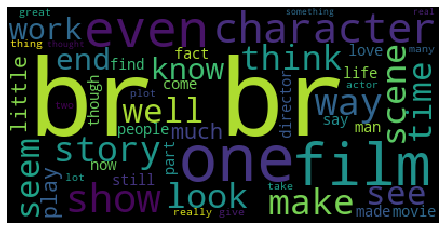

In [206]:
#wordcloud using the axis and tigh_layout function also:
plt.imshow(word_cloud)
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [207]:
word_cloud1=WordCloud(width=800,height=800,background_color='white',
                     max_words=50).generate_from_text(reviews_combined)

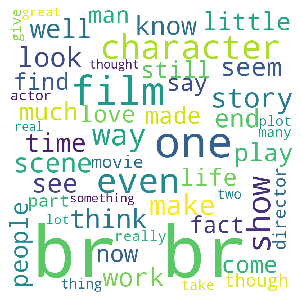

In [208]:
plt.imshow(word_cloud1)
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

#### Storing all the words as lower case:

In [209]:
all_terms=wordpunct_tokenize(reviews_combined.lower())
all_terms

['now',
 ',',
 'i',
 'won',
 "'",
 't',
 'deny',
 'that',
 'when',
 'i',
 'purchased',
 'this',
 'off',
 'ebay',
 ',',
 'i',
 'had',
 'high',
 'expectations',
 '.',
 'this',
 'was',
 'an',
 'incredible',
 'out',
 '-',
 'of',
 '-',
 'print',
 'work',
 'from',
 'the',
 'master',
 'of',
 'comedy',
 'that',
 'i',
 'so',
 'enjoy',
 '.',
 'however',
 ',',
 'i',
 'was',
 'soon',
 'to',
 'be',
 'disappointed',
 '.',
 'apologies',
 'to',
 'those',
 'who',
 'enjoyed',
 'it',
 ',',
 'but',
 'i',
 'just',
 'found',
 'the',
 'compleat',
 'al',
 'to',
 'be',
 'very',
 'difficult',
 'to',
 'watch',
 '.',
 'i',
 'got',
 'a',
 'few',
 'smiles',
 ',',
 'sure',
 ',',
 'but',
 'the',
 'majority',
 'of',
 'the',
 'funny',
 'came',
 'from',
 'the',
 'music',
 'videos',
 '(',
 'which',
 'i',
 "'",
 've',
 'got',
 'on',
 'dvd',
 ')',
 'and',
 'the',
 'rest',
 'was',
 'basically',
 'filler',
 '.',
 'you',
 'could',
 'tell',
 'that',
 'this',
 'was',
 'not',
 'al',
 "'",
 's',
 'greatest',
 'video',
 'achieveme

###### Checking for the top 25 words before removing any stopwords or other words:

In [210]:
from nltk.probability import FreqDist
fdist=FreqDist(all_terms)
fdist

FreqDist({'the': 662910, ',': 515097, '.': 456701, 'and': 322091, 'a': 320717, 'of': 287338, 'to': 266120, "'": 255216, 'is': 209631, 'br': 200425, ...})

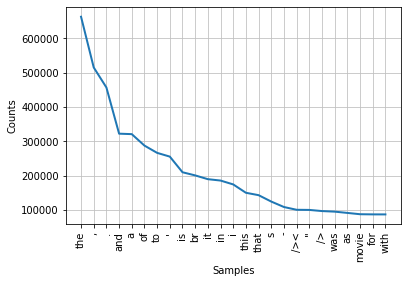

In [211]:
fdist.plot(25,cumulative=False)
plt.show()

#### Finding the highest 25 counts words from the word frequency:

In [212]:
from collections import Counter

top_25_words_count=[]
top_25_words=[]
key = Counter(fdist) 
  
# Finding 25 highest values 
highest = key.most_common(25)  
  
for i in highest: 
    top_25_words_count.append((i[0],i[1]))
    top_25_words.append(i[0])
top_25_words_count

[('the', 662910),
 (',', 515097),
 ('.', 456701),
 ('and', 322091),
 ('a', 320717),
 ('of', 287338),
 ('to', 266120),
 ("'", 255216),
 ('is', 209631),
 ('br', 200425),
 ('it', 189437),
 ('in', 185416),
 ('i', 174140),
 ('this', 149810),
 ('that', 142815),
 ('s', 124159),
 ('-', 108276),
 ('/><', 100211),
 ('"', 99830),
 ('/>', 96478),
 ('was', 94816),
 ('as', 91076),
 ('movie', 87276),
 ('for', 86821),
 ('with', 86717)]

In [213]:
print(top_25_words)

['the', ',', '.', 'and', 'a', 'of', 'to', "'", 'is', 'br', 'it', 'in', 'i', 'this', 'that', 's', '-', '/><', '"', '/>', 'was', 'as', 'movie', 'for', 'with']


## Data Cleaning:

##### Removing the stopwords:

In [214]:
from string import punctuation
from nltk.corpus import stopwords
stop_nltk=stopwords.words("english")
print(stop_nltk)
print(punctuation)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [215]:
stop_updated=stop_nltk+["..","...","!!","''","``","!!!","n't","'re'","'ve'","<br />","br","/><","would",".....",'....','!,"',
                       "!).","!!<","......",'!!!!!"',"!!!!!!!!!!!"]
#stop_updated1=list(set(stop_updated)-{'no', 'nor', 'not'})
print(stop_updated)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [216]:
reviews_updated=[word for word in all_terms if word not in stop_updated and word not in list(punctuation)
                 and len(word)>2]

In [217]:
reviews_updated

['deny',
 'purchased',
 'ebay',
 'high',
 'expectations',
 'incredible',
 'print',
 'work',
 'master',
 'comedy',
 'enjoy',
 'however',
 'soon',
 'disappointed',
 'apologies',
 'enjoyed',
 'found',
 'compleat',
 'difficult',
 'watch',
 'got',
 'smiles',
 'sure',
 'majority',
 'funny',
 'came',
 'music',
 'videos',
 'got',
 'dvd',
 'rest',
 'basically',
 'filler',
 'could',
 'tell',
 'greatest',
 'video',
 'achievement',
 'honor',
 'goes',
 'uhf',
 'honestly',
 'doubt',
 'ever',
 'make',
 'jump',
 'dvd',
 'ultra',
 'hardcore',
 'fan',
 'everything',
 'buy',
 'tape',
 'ebay',
 'pay',
 'much',
 'saddest',
 'thing',
 'tribute',
 'almost',
 'singers',
 'including',
 'otherwise',
 'incredibly',
 'talented',
 'nick',
 'cave',
 'seem',
 'missed',
 'whole',
 'point',
 'cohen',
 'intensity',
 'lies',
 'delivering',
 'lines',
 'almost',
 'tuneless',
 'poise',
 'cohen',
 'transmits',
 'full',
 'extent',
 'poetry',
 'irony',
 'round',
 'humanity',
 'laughter',
 'tears',
 'one',
 'see',
 'singer',
 

### Stemming:

In [218]:
from nltk.stem import SnowballStemmer, PorterStemmer
stemmer_p=PorterStemmer()
stemmer_s=SnowballStemmer('english')

In [219]:
stem_p_words=[stemmer_p.stem(word) for word in reviews_updated]
stem_s_words=[stemmer_s.stem(word) for word in reviews_updated]
print(len(set(stem_p_words)),len(set(stem_s_words)))

72880 71953


### Lemmatization:

In [220]:
from nltk.stem import WordNetLemmatizer
lemm=WordNetLemmatizer()

In [221]:
lemm_words=[lemm.lemmatize(word) for word in reviews_updated]
print(len(set(lemm_words)))

93580


In [222]:
print("The count of words using snowball stemming is: ",len(set(stem_s_words)))
print("The count of words using lemmatization is: ",len(set(lemm_words)))

The count of words using snowball stemming is:  71953
The count of words using lemmatization is:  93580


##### Cleaning Text:

In [223]:
##Combine all the steps and create a udf
##takes one review as input and returns a cleaned review as a string

def clean_txt(text):
    
    tokens=wordpunct_tokenize(text.lower())
    lemma=[lemm.lemmatize(word) for word in tokens if word not in stop_updated and word not in list(punctuation)
           and len(word)>2]
    result=" ".join(lemma)
    return result

In [224]:
final_data['clean_review1']=final_data.text.apply(clean_txt)

C:\Users\Srishti\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [225]:
final_data.head()

,text,sentiment,sentiment_score,clean_review1
0,"Now, I won't deny that when I purchased this o...",neg,0,deny purchased ebay high expectation incredibl...
1,"The saddest thing about this ""tribute"" is that...",neg,0,saddest thing tribute almost singer including ...
2,Last night I decided to watch the prequel or s...,neg,0,last night decided watch prequel shall say cal...
3,I have to admit that i liked the first half of...,neg,0,admit liked first half sleeper looked good act...
4,I was not impressed about this film especially...,neg,0,impressed film especially fact went cinema fam...


### Word Cloud After Data Cleaning:

In [226]:
#### clean_review1 is the finally cleaned data which can be used in further processing

reviews_combined1=" ".join(final_data.clean_review1.values)

In [227]:
reviews_combined1[:100]

'deny purchased ebay high expectation incredible print work master comedy enjoy however soon disappoi'

In [228]:
word_cloud_after_clean=WordCloud(max_words=50).generate(reviews_combined1)

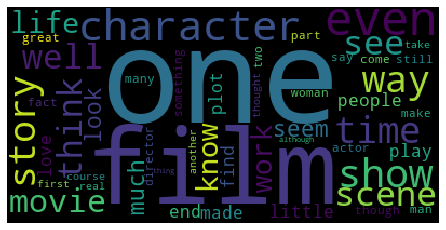

In [229]:
#wordcloud using the axis and tigh_layout function also:
plt.imshow(word_cloud_after_clean)
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

#### Storing all the words after cleaning data:

In [230]:
all_terms_clean=wordpunct_tokenize(reviews_combined1.lower())
all_terms_clean

['deny',
 'purchased',
 'ebay',
 'high',
 'expectation',
 'incredible',
 'print',
 'work',
 'master',
 'comedy',
 'enjoy',
 'however',
 'soon',
 'disappointed',
 'apology',
 'enjoyed',
 'found',
 'compleat',
 'difficult',
 'watch',
 'got',
 'smile',
 'sure',
 'majority',
 'funny',
 'came',
 'music',
 'video',
 'got',
 'dvd',
 'rest',
 'basically',
 'filler',
 'could',
 'tell',
 'greatest',
 'video',
 'achievement',
 'honor',
 'go',
 'uhf',
 'honestly',
 'doubt',
 'ever',
 'make',
 'jump',
 'dvd',
 'ultra',
 'hardcore',
 'fan',
 'everything',
 'buy',
 'tape',
 'ebay',
 'pay',
 'much',
 'saddest',
 'thing',
 'tribute',
 'almost',
 'singer',
 'including',
 'otherwise',
 'incredibly',
 'talented',
 'nick',
 'cave',
 'seem',
 'missed',
 'whole',
 'point',
 'cohen',
 'intensity',
 'lie',
 'delivering',
 'line',
 'almost',
 'tuneless',
 'poise',
 'cohen',
 'transmits',
 'full',
 'extent',
 'poetry',
 'irony',
 'round',
 'humanity',
 'laughter',
 'tear',
 'one',
 'see',
 'singer',
 'upstart',


###### Checking for the top 25 words after removing all stopwords or other words:

In [231]:
fdist1=FreqDist(all_terms_clean)
fdist1

FreqDist({'movie': 102500, 'film': 92815, 'one': 55037, 'like': 40788, 'time': 31207, 'good': 29662, 'character': 28126, 'story': 25110, 'even': 24669, 'get': 24464, ...})

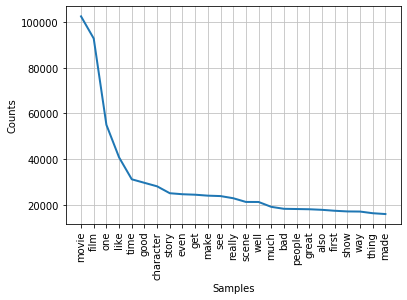

In [232]:
fdist1.plot(25,cumulative=False)
plt.show()

#### Finding the highest 25 counts words from the word frequency:

In [233]:
from collections import Counter

top_25_words_clean_count=[]
top_25_words_clean=[]
key1 = Counter(fdist1) 
  
# Finding 25 highest values 
highest_count = key1.most_common(25)  
  
for i in highest_count: 
    top_25_words_clean_count.append((i[0],i[1]))
    top_25_words_clean.append(i[0])
top_25_words_clean_count

[('movie', 102500),
 ('film', 92815),
 ('one', 55037),
 ('like', 40788),
 ('time', 31207),
 ('good', 29662),
 ('character', 28126),
 ('story', 25110),
 ('even', 24669),
 ('get', 24464),
 ('make', 24048),
 ('see', 23863),
 ('really', 22923),
 ('scene', 21298),
 ('well', 21283),
 ('much', 19151),
 ('bad', 18293),
 ('people', 18201),
 ('great', 18099),
 ('also', 17851),
 ('first', 17437),
 ('show', 17146),
 ('way', 17091),
 ('thing', 16364),
 ('made', 16004)]

In [234]:
print(top_25_words_clean)

['movie', 'film', 'one', 'like', 'time', 'good', 'character', 'story', 'even', 'get', 'make', 'see', 'really', 'scene', 'well', 'much', 'bad', 'people', 'great', 'also', 'first', 'show', 'way', 'thing', 'made']


#### Creating list of positive, negative and neutral words.

In [235]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]

for word in all_terms_clean:
    if (sid.polarity_scores(word)['compound']) >=0. 5:
        pos_word_list.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.5:
        neg_word_list.append(word)
    else:
        neu_word_list.append(word)                

print('Positive :',pos_word_list)

Positive : ['enjoyed', 'greatest', 'talented', 'love', 'amazing', 'superior', 'rescue', 'great', 'enjoyed', 'wonderful', 'successful', 'wonderful', 'love', 'joy', 'honest', 'kind', 'happy', 'fun', 'great', 'greatest', 'great', 'great', 'best', 'great', 'best', 'romance', 'romance', 'sexy', 'fun', 'wonderful', 'proudly', 'trust', 'cheer', 'kind', 'greatest', 'laugh', 'inspiration', 'happy', 'happy', 'great', 'great', 'outstanding', 'best', 'strong', 'love', 'happiness', 'blockbuster', 'wow', 'outstanding', 'brilliance', 'love', 'beauty', 'outstanding', 'love', 'beauty', 'love', 'brilliant', 'best', 'lover', 'greatest', 'delight', 'remarkable', 'lovely', 'laugh', 'perfect', 'amazing', 'great', 'laugh', 'best', 'best', 'marvelous', 'perfect', 'fun', 'excellent', 'brilliant', 'love', 'honest', 'amazing', 'laugh', 'love', 'winner', 'kind', 'inspiration', 'lover', 'excellent', 'best', 'joy', 'kissing', 'great', 'kind', 'laugh', 'excellent', 'great', 'splendid', 'kudos', 'excellent', 'impress

In [236]:
print('Negative :',neg_word_list)

Negative : ['saddest', 'pathetic', 'pain', 'horrendous', 'bad', 'sadder', 'bad', 'bad', 'pain', 'revenge', 'murder', 'cheated', 'insulted', 'murderer', 'anger', 'crude', 'depression', 'anger', 'dead', 'sucker', 'bad', 'fail', 'horror', 'murder', 'betrayal', 'murder', 'worst', 'grieving', 'bad', 'horror', 'failing', 'bad', 'angry', 'terror', 'death', 'sin', 'crude', 'nasty', 'bad', 'crude', 'dead', 'sin', 'heartbroken', 'killer', 'ruin', 'bad', 'murdered', 'tortured', 'tragedy', 'horror', 'dumbest', 'horror', 'horrible', 'horror', 'devil', 'horror', 'bad', 'horrible', 'insult', 'disappointment', 'grim', 'death', 'hated', 'bad', 'worst', 'worst', 'suicide', 'suicide', 'tragedy', 'killing', 'bad', 'die', 'killed', 'killed', 'killing', 'murder', 'disturbing', 'death', 'nasty', 'violence', 'rapist', 'stealing', 'killer', 'ugly', 'racist', 'murder', 'sorrow', 'wicked', 'worst', 'worst', 'horrible', 'worst', 'killer', 'loser', 'tragedy', 'depression', 'murder', 'sinister', 'insanity', 'stupid

#### Creating positive, negative and neutral words dataframe as per their count.

In [237]:
list_words_count_pos={}
list_words_count_neg={}
list_words_count_neu={}

for i in pos_word_list:
    list_words_count_pos[i]=list_words_count_pos.get(i,0)+1
pos_series=pd.Series(list_words_count_pos)

for i in neg_word_list:
    list_words_count_neg[i]=list_words_count_neg.get(i,0)+1
neg_series=pd.Series(list_words_count_neg)

for i in neu_word_list:
    list_words_count_neu[i]=list_words_count_neu.get(i,0)+1
neu_series=pd.Series(list_words_count_neu)

pos_words_df1=pd.DataFrame(pos_series).reset_index()
pos_words_df=pos_words_df1.rename(columns={'index':'Words',0:'Count'})

neg_words_df1=pd.DataFrame(neg_series).reset_index()
neg_words_df=neg_words_df1.rename(columns={'index':'Words',0:'Count'})

neu_words_df1=pd.DataFrame(neu_series).reset_index()
neu_words_df=neu_words_df1.rename(columns={'index':'Words',0:'Count'})

### Plot top 25 positive words highly used.

In [238]:
pos_words_df.head()

,Words,Count
0,enjoyed,2394
1,greatest,1502
2,talented,1131
3,love,13724
4,amazing,2508


In [239]:
top_25_pos_words=pos_words_df.sort_values(by='Count',ascending=False).head(25)

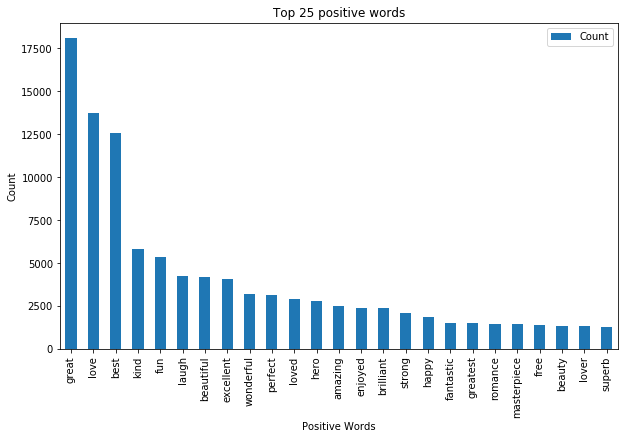

In [240]:
top_25_pos_words.plot(kind='bar',x='Words',y='Count',figsize=(10,6))
plt.ylabel('Count')
plt.xlabel('Positive Words')
plt.title('Top 25 positive words')
plt.show()

### Plot top 25 negative words highly used.

In [241]:
neg_words_df.head()

,Words,Count
0,saddest,71
1,pathetic,976
2,pain,851
3,horrendous,251
4,bad,18293


In [242]:
top_25_neg_words=neg_words_df.sort_values(by='Count',ascending=False).head(25)

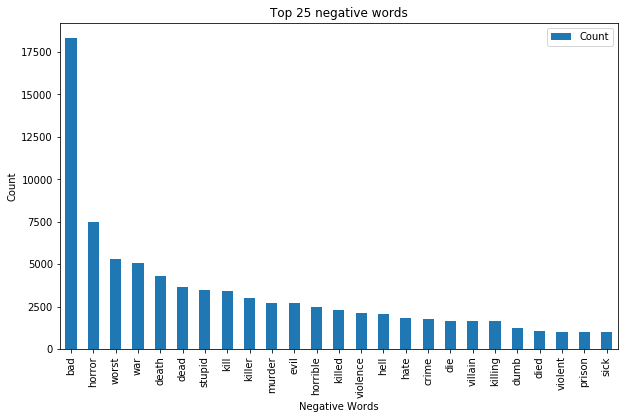

In [243]:
top_25_neg_words.plot(kind='bar',x='Words',y='Count',figsize=(10,6))
plt.ylabel('Count')
plt.xlabel('Negative Words')
plt.title('Top 25 negative words')
plt.show()

### Plot top 25 neutral words highly used.

In [244]:
neu_words_df.head()

,Words,Count
0,deny,112
1,purchased,169
2,ebay,85
3,high,4345
4,expectation,886


In [245]:
top_25_neu_words=neu_words_df.sort_values(by='Count',ascending=False).head(25)

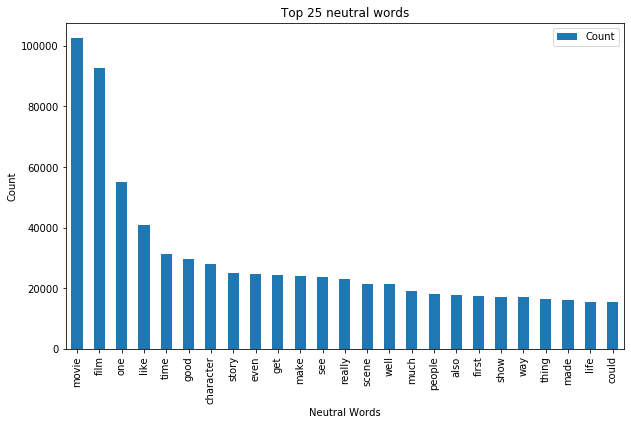

In [246]:
top_25_neu_words.plot(kind='bar',x='Words',y='Count',figsize=(10,6))
plt.ylabel('Count')
plt.xlabel('Neutral Words')
plt.title('Top 25 neutral words')
plt.show()

In [249]:
print("Count of positive words after cleaning but may contain duplicates",len(pos_word_list))
print("Count of negative words after cleaning but may contain duplicates",len(neg_word_list))
print("Count of neutral words after cleaning but may contain duplicates",len(neu_word_list))

Count of positive words after cleaning but may contain duplicates 154398
Count of negative words after cleaning but may contain duplicates 137107
Count of neutral words after cleaning but may contain duplicates 5519317


In [250]:
final_data.describe()

,sentiment_score
count,49582.000000
mean,0.501876
std,0.500002
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


#### EDA

In [61]:
print('Average word length of reviews in train is {0:.0f}.'.format(np.mean(train_data_wo_dup['text'].\
                                                                           apply(lambda x: len(x.split())))))
print('Average word length of reviews in test is {0:.0f}.'.format(np.mean(test_data_wo_dup['text'].\
                                                                          apply(lambda x: len(x.split())))))

Average word length of reviews in train is 234.
Average word length of reviews in test is 229.


In [62]:
print('Average word length of reviews in train is {0:.0f}.'.format(np.mean(train_data['text'].\
                                                                           apply(lambda x: len(x.split())))))
print('Average word length of reviews in test is {0:.0f}.'.format(np.mean(test_data['text'].\
                                                                          apply(lambda x: len(x.split())))))

Average word length of reviews in train is 234.
Average word length of reviews in test is 229.


In [63]:
print('Average word length of reviews in final before cleaning is {0:.0f}.'.format(np.mean(final_data['text'].\
                                                                            apply(lambda x: len(x.split())))))

Average word length of reviews in final before cleaning is 231.


In [64]:
print('Average word length of reviews in final after cleaning is {0:.0f}.'.format(np.mean(final_data['clean_review1'].\
                                                                                          apply(lambda x: len(x.split())))))

Average word length of reviews in final after cleaning is 117.


In [65]:
final_data.head()

,text,sentiment,sentiment_score,clean_review1
0,"Now, I won't deny that when I purchased this o...",neg,0,deny purchased ebay high expectation incredibl...
1,"The saddest thing about this ""tribute"" is that...",neg,0,saddest thing tribute almost singer including ...
2,Last night I decided to watch the prequel or s...,neg,0,last night decided watch prequel shall say cal...
3,I have to admit that i liked the first half of...,neg,0,admit liked first half sleeper looked good act...
4,I was not impressed about this film especially...,neg,0,impressed film especially fact went cinema fam...


### N-Gram Analysis:

#### Unigram:

##### Plot a unigram bar graph on the top words 25 words

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer_ug=CountVectorizer(ngram_range=(1,1),max_features=150)

In [67]:
X_ug=count_vectorizer_ug.fit_transform(final_data['clean_review1'])
X_ug

<49582x150 sparse matrix of type '<class 'numpy.int64'>'
	with 1219307 stored elements in Compressed Sparse Row format>

In [68]:
DTM_ug=pd.DataFrame(X_ug.toarray(),columns=count_vectorizer_ug.get_feature_names())
DTM_ug.head()

,acting,action,actor,actually,almost,also,always,american,another,anyone,...,well,whole,without,woman,work,world,worst,year,yet,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,2,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,3
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [69]:
top25_uni=DTM_ug.sum().sort_values(ascending=False).head(25)
top25_uni

movie        102500
film          92815
one           55037
like          40788
time          31207
good          29662
character     28126
story         25110
even          24669
get           24464
make          24048
see           23863
really        22923
scene         21298
well          21283
much          19151
bad           18293
people        18201
great         18099
also          17851
first         17437
show          17146
way           17091
thing         16364
made          16004
dtype: int64

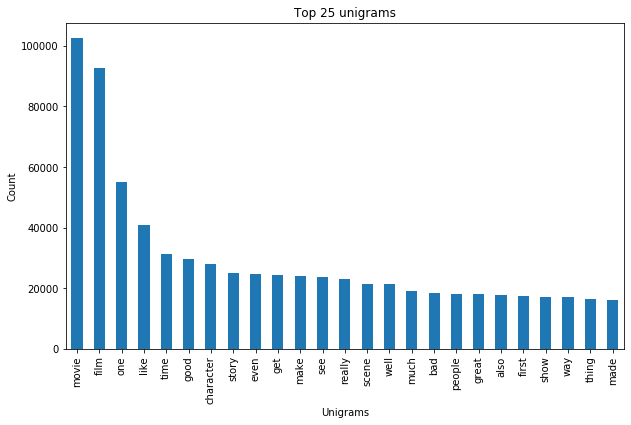

In [164]:
top25_uni.plot(kind='bar',figsize=(10,6))
plt.ylabel('Count')
plt.xlabel('Unigrams')
plt.title('Top 25 unigrams')
plt.show()

#### Bigram:

##### Plot a bigram bar graph on the top words 25 words

In [71]:
count_vectorizer_bg=CountVectorizer(ngram_range=(2,2),max_features=150)

In [72]:
X_bg=count_vectorizer_bg.fit_transform(final_data['clean_review1'])
X_bg

<49582x150 sparse matrix of type '<class 'numpy.int64'>'
	with 126748 stored elements in Compressed Sparse Row format>

In [73]:
DTM_bg=pd.DataFrame(X_bg.toarray(),columns=count_vectorizer_bg.get_feature_names())
DTM_bg.head()

,action movie,bad acting,bad film,bad guy,bad movie,best film,best movie,black white,camera work,character development,...,world war,worst film,worst movie,worth watching,writer director,year ago,year later,year old,young man,young woman
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
top25_bi=DTM_bg.sum().sort_values(ascending=False).head(25)
top25_bi

look like         2896
ever seen         2696
year old          2357
special effect    2312
even though       1980
movie ever        1976
one best          1912
main character    1904
movie like        1854
low budget        1833
good movie        1642
horror movie      1617
see movie         1583
waste time        1513
much better       1484
horror film       1454
bad movie         1446
watch movie       1430
first time        1422
movie one         1363
make movie        1341
film like         1331
new york          1307
year ago          1292
bad guy           1260
dtype: int64

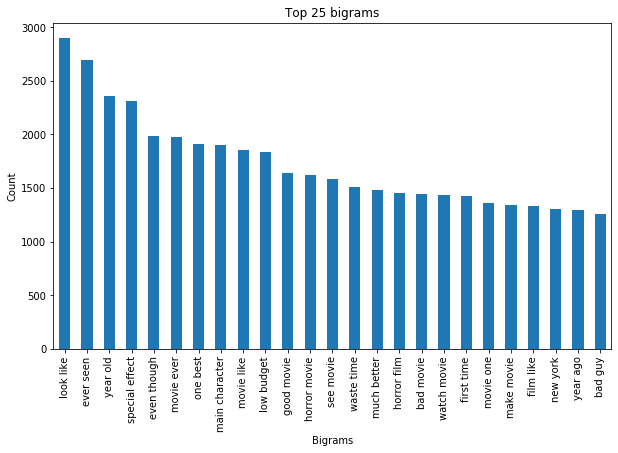

In [166]:
top25_bi.plot(kind='bar',figsize=(10,6))
plt.ylabel('Count')
plt.xlabel('Bigrams')
plt.title('Top 25 bigrams')
plt.show()

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create a bigram count vectorizer object
bigram_tfidf_vectorizer = TfidfVectorizer(ngram_range=(2,2),max_features=2000)

X_bigram = bigram_tfidf_vectorizer.fit_transform(final_data['clean_review1'])

# Creating a DTM
DTM_bigram = pd.DataFrame(X_bigram.toarray(), 
                          columns=bigram_tfidf_vectorizer.get_feature_names())

In [77]:
DTM_bigram['special effect'].sort_values(ascending=False).head(5)

33702    1.0
7526     1.0
3173     1.0
31847    1.0
16511    1.0
Name: special effect, dtype: float64

#### Trigram:

##### Plot a trigram bar graph on the top words 25 words

In [78]:
count_vectorizer_tg=CountVectorizer(ngram_range=(3,3),max_features=150)

In [79]:
X_tg=count_vectorizer_tg.fit_transform(final_data['clean_review1'])
X_tg

<49582x150 sparse matrix of type '<class 'numpy.int64'>'
	with 15464 stored elements in Compressed Sparse Row format>

In [80]:
DTM_tg=pd.DataFrame(X_tg.toarray(),columns=count_vectorizer_tg.get_feature_names())
DTM_tg.head()

,actually pretty good,bad acting bad,bad bad bad,based true story,best film ever,best movie ever,best movie seen,best part movie,best thing movie,black white film,...,worst film ever,worst film seen,worst movie ever,worst movie seen,worst movie time,year old boy,year old daughter,year old girl,year old son,year old virgin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
top25_tri=DTM_tg.sum().sort_values(ascending=False).head(25)
top25_tri

movie ever seen        902
worst movie ever       749
film ever seen         446
movie ever made        380
worst film ever        351
one worst movie        329
film ever made         322
new york city          276
low budget movie       189
one worst film         182
based true story       182
low budget film        181
waste time money       181
one best movie         176
seen long time         170
one best film          170
best movie ever        153
first time saw         149
low budget horror      140
two main character     138
bad acting bad         136
complete waste time    125
good thing movie       120
year old boy           119
make look like         117
dtype: int64

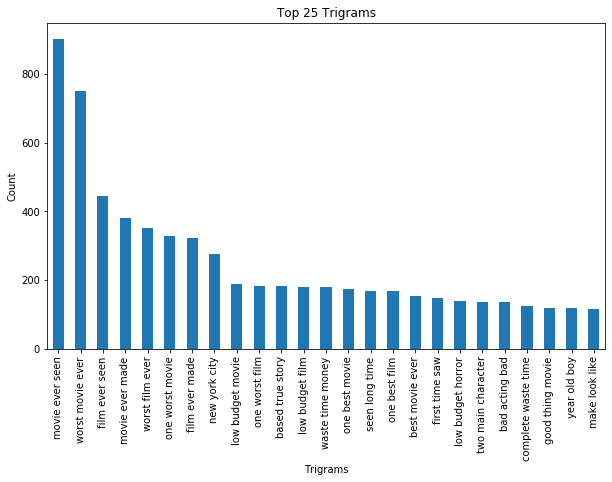

In [251]:
top25_tri.plot(kind='bar',figsize=(10,6))
plt.ylabel('Count')
plt.xlabel('Trigrams')
plt.title('Top 25 Trigrams')
plt.show()

### Sentiment Score:

#### Sentiment Prediction Strategy 1: Sentiment Score by using AFINN-111.txt file

In [252]:
afinn = pd.read_csv("C:/Users/Srishti/Desktop/Data Science/Unstructured Data/Text Analytics/AFINN-111.txt", sep="\t",header=None)
afinn.head()

,0,1
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [253]:
afinn.columns = ['Term','Score']
afinn.head()

,Term,Score
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [254]:
term_scores=dict(afinn.values)

In [255]:
#UDF:
def get_sentiment1(text):
    score1=0
    tokens1=wordpunct_tokenize(text.lower())
    for term1 in tokens1:
        score1+=term_scores.get(term1,0)
    return score1

In [256]:
final_data['sent_score1']=final_data['clean_review1'].apply(get_sentiment1)
final_data.head()

C:\Users\Srishti\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,sentiment,sentiment_score,clean_review1,sent_score1
0,"Now, I won't deny that when I purchased this o...",neg,0,deny purchased ebay high expectation incredibl...,9
1,"The saddest thing about this ""tribute"" is that...",neg,0,saddest thing tribute almost singer including ...,-19
2,Last night I decided to watch the prequel or s...,neg,0,last night decided watch prequel shall say cal...,0
3,I have to admit that i liked the first half of...,neg,0,admit liked first half sleeper looked good act...,-8
4,I was not impressed about this film especially...,neg,0,impressed film especially fact went cinema fam...,14


In [257]:
final_data['sent_prediction1']=final_data['sent_score1'].apply(lambda x:1 if x>0 else 0)
final_data.head()

C:\Users\Srishti\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,sentiment,sentiment_score,clean_review1,sent_score1,sent_prediction1
0,"Now, I won't deny that when I purchased this o...",neg,0,deny purchased ebay high expectation incredibl...,9,1
1,"The saddest thing about this ""tribute"" is that...",neg,0,saddest thing tribute almost singer including ...,-19,0
2,Last night I decided to watch the prequel or s...,neg,0,last night decided watch prequel shall say cal...,0,0
3,I have to admit that i liked the first half of...,neg,0,admit liked first half sleeper looked good act...,-8,0
4,I was not impressed about this film especially...,neg,0,impressed film especially fact went cinema fam...,14,1


##### Accuracy for 1st sentimental score:

In [258]:
from sklearn.metrics import accuracy_score
accuracy_score(final_data.sentiment_score,final_data.sent_prediction1)

0.6934371344439514

###### Without using lemmatizer, create one more reviews segment to calculate the sentimental score and its improved accuracy:

In [259]:
def clean_txt1(text):
    
    tokens2=wordpunct_tokenize(text.lower())
    without_lemma=[word for word in tokens2 if word not in stop_updated and word not in list(punctuation)
                 and len(word)>2]
    res=" ".join(without_lemma)
    return res

In [260]:
final_data['clean_review_w/o_lem']=final_data.text.apply(clean_txt1)
final_data.head()

C:\Users\Srishti\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,sentiment,sentiment_score,clean_review1,sent_score1,sent_prediction1,clean_review_w/o_lem
0,"Now, I won't deny that when I purchased this o...",neg,0,deny purchased ebay high expectation incredibl...,9,1,deny purchased ebay high expectations incredib...
1,"The saddest thing about this ""tribute"" is that...",neg,0,saddest thing tribute almost singer including ...,-19,0,saddest thing tribute almost singers including...
2,Last night I decided to watch the prequel or s...,neg,0,last night decided watch prequel shall say cal...,0,0,last night decided watch prequel shall say cal...
3,I have to admit that i liked the first half of...,neg,0,admit liked first half sleeper looked good act...,-8,0,admit liked first half sleepers looked good ac...
4,I was not impressed about this film especially...,neg,0,impressed film especially fact went cinema fam...,14,1,impressed film especially fact went cinema fam...


In [261]:
#UDF:
def get_sentiment2(text):
    score2=0
    tokens2=wordpunct_tokenize(text.lower())
    for term2 in tokens2:
        score2+=term_scores.get(term2,0)
    return score2

In [262]:
final_data['sent_score_w/o_lem']=final_data['clean_review_w/o_lem'].apply(get_sentiment2)
final_data.head()

C:\Users\Srishti\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,sentiment,sentiment_score,clean_review1,sent_score1,sent_prediction1,clean_review_w/o_lem,sent_score_w/o_lem
0,"Now, I won't deny that when I purchased this o...",neg,0,deny purchased ebay high expectation incredibl...,9,1,deny purchased ebay high expectations incredib...,10
1,"The saddest thing about this ""tribute"" is that...",neg,0,saddest thing tribute almost singer including ...,-19,0,saddest thing tribute almost singers including...,-21
2,Last night I decided to watch the prequel or s...,neg,0,last night decided watch prequel shall say cal...,0,0,last night decided watch prequel shall say cal...,0
3,I have to admit that i liked the first half of...,neg,0,admit liked first half sleeper looked good act...,-8,0,admit liked first half sleepers looked good ac...,-6
4,I was not impressed about this film especially...,neg,0,impressed film especially fact went cinema fam...,14,1,impressed film especially fact went cinema fam...,14


In [263]:
final_data['sent_prediction_w/o_lem']=final_data['sent_score_w/o_lem'].apply(lambda x:1 if x>0 else 0)
final_data.head()

C:\Users\Srishti\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,sentiment,sentiment_score,clean_review1,sent_score1,sent_prediction1,clean_review_w/o_lem,sent_score_w/o_lem,sent_prediction_w/o_lem
0,"Now, I won't deny that when I purchased this o...",neg,0,deny purchased ebay high expectation incredibl...,9,1,deny purchased ebay high expectations incredib...,10,1
1,"The saddest thing about this ""tribute"" is that...",neg,0,saddest thing tribute almost singer including ...,-19,0,saddest thing tribute almost singers including...,-21,0
2,Last night I decided to watch the prequel or s...,neg,0,last night decided watch prequel shall say cal...,0,0,last night decided watch prequel shall say cal...,0,0
3,I have to admit that i liked the first half of...,neg,0,admit liked first half sleeper looked good act...,-8,0,admit liked first half sleepers looked good ac...,-6,0
4,I was not impressed about this film especially...,neg,0,impressed film especially fact went cinema fam...,14,1,impressed film especially fact went cinema fam...,14,1


##### Accuracy for sentimental score without lemmatizing:

In [264]:
accuracy_score(final_data.sentiment_score,final_data['sent_prediction_w/o_lem'])

0.6936186519301359

#### Sentiment Prediction Strategy 2: Vader

In [265]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser=SentimentIntensityAnalyzer()

In [266]:
##UDF
def get_vader_sentiment(text):
    return analyser.polarity_scores(text)['compound']

In [267]:
final_data['vader_sent']=final_data['text'].apply(get_vader_sentiment)
final_data.head()

C:\Users\Srishti\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,sentiment,sentiment_score,clean_review1,sent_score1,sent_prediction1,clean_review_w/o_lem,sent_score_w/o_lem,sent_prediction_w/o_lem,vader_sent
0,"Now, I won't deny that when I purchased this o...",neg,0,deny purchased ebay high expectation incredibl...,9,1,deny purchased ebay high expectations incredib...,10,1,0.9410
1,"The saddest thing about this ""tribute"" is that...",neg,0,saddest thing tribute almost singer including ...,-19,0,saddest thing tribute almost singers including...,-21,0,-0.9226
2,Last night I decided to watch the prequel or s...,neg,0,last night decided watch prequel shall say cal...,0,0,last night decided watch prequel shall say cal...,0,0,0.8002
3,I have to admit that i liked the first half of...,neg,0,admit liked first half sleeper looked good act...,-8,0,admit liked first half sleepers looked good ac...,-6,0,-0.4825
4,I was not impressed about this film especially...,neg,0,impressed film especially fact went cinema fam...,14,1,impressed film especially fact went cinema fam...,14,1,0.6718


In [268]:
final_data['vader_prediction']=final_data['vader_sent'].apply(lambda x:1 if x>0.3 else 0)
final_data.head()

C:\Users\Srishti\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,sentiment,sentiment_score,clean_review1,sent_score1,sent_prediction1,clean_review_w/o_lem,sent_score_w/o_lem,sent_prediction_w/o_lem,vader_sent,vader_prediction
0,"Now, I won't deny that when I purchased this o...",neg,0,deny purchased ebay high expectation incredibl...,9,1,deny purchased ebay high expectations incredib...,10,1,0.9410,1
1,"The saddest thing about this ""tribute"" is that...",neg,0,saddest thing tribute almost singer including ...,-19,0,saddest thing tribute almost singers including...,-21,0,-0.9226,0
2,Last night I decided to watch the prequel or s...,neg,0,last night decided watch prequel shall say cal...,0,0,last night decided watch prequel shall say cal...,0,0,0.8002,1
3,I have to admit that i liked the first half of...,neg,0,admit liked first half sleeper looked good act...,-8,0,admit liked first half sleepers looked good ac...,-6,0,-0.4825,0
4,I was not impressed about this film especially...,neg,0,impressed film especially fact went cinema fam...,14,1,impressed film especially fact went cinema fam...,14,1,0.6718,1


##### Accuracy for sentimental score:

In [269]:
accuracy_score(final_data.sentiment_score,final_data['vader_prediction'])

0.7056794804566173

#### Sentiment Prediction Strategy 3: Building our own model

In [270]:
X=final_data.clean_review1
y=final_data.sentiment_score

In [271]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=31)

#### Using CountVectorizer

In [272]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer()

In [273]:
X_train_bow=count_vect.fit_transform(X_train)
X_test_bow=count_vect.transform(X_test)

In [274]:
print(X_train_bow.shape,X_test_bow.shape)

(39665, 83023) (9917, 83023)


##### Model building using logistic regression

In [275]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [276]:
log_reg=LogisticRegression()
log_reg.fit(X_train_bow,y_train)

C:\Users\Srishti\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [277]:
y_test_pred=log_reg.predict(X_test_bow)

In [278]:
accuracy_score(y_test,y_test_pred) 

0.8820207724110114

In [279]:
confusion_matrix(y_test,y_test_pred)

array([[4260,  615],
       [ 555, 4487]], dtype=int64)

#### Using TfidfVectorizer

In [280]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect=TfidfVectorizer()

In [281]:
X_train_bow1=tfidf_vect.fit_transform(X_train)
X_test_bow1=tfidf_vect.transform(X_test)

In [282]:
print(X_train_bow1.shape,X_test_bow1.shape)

(39665, 83023) (9917, 83023)


##### Model building using logistic regression

In [283]:
log_reg1=LogisticRegression()
log_reg1.fit(X_train_bow1,y_train)

C:\Users\Srishti\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [284]:
y_test_pred1=log_reg1.predict(X_test_bow1)

In [285]:
accuracy_score(y_test,y_test_pred1) 

0.8951295754764546

In [286]:
confusion_matrix(y_test,y_test_pred1)#here FN is also the least

array([[4292,  583],
       [ 457, 4585]], dtype=int64)

##### If I pick the adjectives from the reviews, it will help me to get the idea about the quality(i.e., bad, good, impressed) of the review depending on the type of concerned areas which can be understood by the nouns(like movie genre,music,character). 
##### Being able to understand about the following parts of speech we can understand how the audience's behaviour is depending on these words. And finally, we would be able to get the concerned areas hopefully by tracing those words relevancy.

### Customer Concern Areas:

In [297]:
###How to extract nouns or adjectives from a review by using spacy
import spacy

In [298]:
##Parts Of Speech(POS)
nlp=spacy.load("en_core_web_sm") ##pos tagging

In [299]:
doc1=nlp(final_data.text[0]) ### model.predict(text)
doc1

Now, I won't deny that when I purchased this off eBay, I had high expectations. This was an incredible out-of-print work from the master of comedy that I so enjoy. However, I was soon to be disappointed. Apologies to those who enjoyed it, but I just found the Compleat Al to be very difficult to watch. I got a few smiles, sure, but the majority of the funny came from the music videos (which I've got on DVD) and the rest was basically filler. You could tell that this was not Al's greatest video achievement (that honor goes to UHF). Honestly, I doubt if this will ever make the jump to DVD, so if you're an ultra-hardcore Al fan and just HAVE to own everything, buy the tape off eBay. Just don't pay too much for it.

In [300]:
#### all the cleaned and lemmatized reviews have been stored as list in the variable review_list
review_list=list(final_data.clean_review1) 

In [301]:
review_list[0]

'deny purchased ebay high expectation incredible print work master comedy enjoy however soon disappointed apology enjoyed found compleat difficult watch got smile sure majority funny came music video got dvd rest basically filler could tell greatest video achievement honor go uhf honestly doubt ever make jump dvd ultra hardcore fan everything buy tape ebay pay much'

#### Extract nouns for all reviews

In [302]:
from tqdm import tqdm
nouns=[]
for review in tqdm(review_list):
    doc=nlp(review)
    for token in doc:
        if token.pos_=='NOUN':
            nouns.append(token.text)

100%|████████████████████████████████████████████████████████████████████████████| 49582/49582 [22:49<00:00, 36.21it/s]


In [303]:
pd.Series(nouns).value_counts().head(10)

movie        94821
film         82844
time         29888
character    24037
story        23202
scene        19206
people       18121
thing        15600
way          14250
life         13450
dtype: int64

In [304]:
###Make our code multithreaded
###Make sure we are not doing any extra processing

###Using the below model along with the pipeline will help us to process large set of data with minimum time as we can see in 
###the above case, i.e., while extracting Nouns it took me more time where i didn't use any pipeline and model while extracting
###Adjectives it took some minutes only to get the words

### the model of english language in spacy is "en_core_web_sm"

### tagger : Assign part-of-speech tags. (Tagger)
### parser : Assign dependency labels. (Dependency Parser)
### ner : Detect and label named entities. (Entity Recognizer)

### The pipeline used by the default models consists of a tagger, a parser and an entity recognizer. 
### Each pipeline component returns the processed Doc, which is then passed on to the next component.

nlp1=spacy.load('en_core_web_sm',disable=['parser','ner'])

#### Pipeline uasges:
- Process the texts as a stream using nlp.pipe and buffer them in batches, instead of one-by-one. This is usually much more efficient.
- Only apply the pipeline components you need. Getting predictions from the model that you don’t actually need adds up and becomes very inefficient at scale. To prevent this, use the disable keyword argument to disable components you don’t need – either when loading a model, or during processing with nlp.pipe.

#### Extract adjectives for all reviews

In [305]:
from tqdm import tqdm
adjectives=[]
for doc in tqdm(nlp1.pipe(review_list,batch_size=1,n_process=-1),total=len(review_list)):
    for token in doc:
        if token.pos_=='ADJ':
            adjectives.append(token.text)

100%|███████████████████████████████████████████████████████████████████████████| 49582/49582 [05:01<00:00, 164.29it/s]


In [306]:
pd.Series(adjectives).value_counts().head(10)

good      26897
bad       17931
great     15868
many      13353
little    11424
much      11413
best       9812
first      9218
real       8256
old        8220
dtype: int64

In [309]:
####Visualizing using spacy the 1st text:

from spacy import displacy
final_datax = nlp(final_data['clean_review1'][0])
displacy.render(final_datax, style="ent")  ## It will highlight the named entities(entity recognition) as person or Org, etc.
[(ent.text, ent.label_) for ent in final_datax.ents] ##Mentions the ner (person,product,etc) from the statements

[('ebay', 'ORG'), ('dvd', 'PRODUCT')]

In [310]:
### film, story, character:
### About "film" keyword what are they talking?
### what is "best" according to them that they are talking about?
### so we will find words_preceeded by film to get an idea
### and we will also find words_succeeded by film

In [311]:
### regex for word preceeding and succeeding 'any keyword'? 

In [312]:
import re

In [313]:
def gen_results(kw,reviews_data):
    pattern=re.compile(r"\w+\s{}\s\w+".format(kw))
    prefix_suffix=(re.findall(pattern,reviews_data))
    prefixes=[x.split()[0].lower() for x in prefix_suffix]
    suffixes=[x.split()[-1].lower() for x in prefix_suffix]
    prefixes_wo_stpwrds=[word for word in prefixes if not word in stop_updated]
    suffixes_wo_stpwrds=[word for word in suffixes if not word in stop_updated]
    top_pre=pd.Series(prefixes_wo_stpwrds).value_counts().head(5).index
    top_suff=pd.Series(suffixes_wo_stpwrds).value_counts().head(5).index
    table=pd.DataFrame({'before':top_pre,'after':top_suff})
    table['keyword']=kw
    return table[['before','keyword','after']]

In [314]:
# Join all the strings in list to form a complete string type document
normal_text=list(final_data['clean_review1'])
seperator = '\n '
final_str = seperator.join(normal_text)
print(final_str[0:2000])

deny purchased ebay high expectation incredible print work master comedy enjoy however soon disappointed apology enjoyed found compleat difficult watch got smile sure majority funny came music video got dvd rest basically filler could tell greatest video achievement honor go uhf honestly doubt ever make jump dvd ultra hardcore fan everything buy tape ebay pay much
 saddest thing tribute almost singer including otherwise incredibly talented nick cave seem missed whole point cohen intensity lie delivering line almost tuneless poise cohen transmits full extent poetry irony round humanity laughter tear one see singer upstart make convoluted suffering face launch pathetic squeal patent effort scream singer true pain feeling many probably listening horrendous operatic version simple song lennon imagine nothing simply nothing get close simplicity directness original form art need embellishment cohen art embellishment cast street looking like tasteless make sex sale cohen tribute found sufferi

In [315]:
gen_results(kw='film',reviews_data=final_str)

,before,keyword,after
0,horror,film,like
1,see,film,ever
2,make,film,one
3,good,film,made
4,great,film,making


In [316]:
gen_results(kw='character',reviews_data=final_str)

,before,keyword,after
0,main,character,development
1,one,character,movie
2,lead,character,film
3,movie,character,actor
4,film,character,well


In [317]:
gen_results(kw='story',reviews_data=final_str)

,before,keyword,after
0,love,story,line
1,tell,story,one
2,true,story,told
3,good,story,film
4,great,story,movie


In [318]:
gen_results(kw='scene',reviews_data=final_str)

,before,keyword,after
0,one,scene,movie
1,sex,scene,film
2,fight,scene,one
3,action,scene,scene
4,every,scene,like


In [319]:
gen_results(kw='best',reviews_data=final_str)

,before,keyword,after
0,one,best,film
1,probably,best,friend
2,movie,best,movie
3,film,best,part
4,far,best,performance


In [320]:
gen_results(kw='bad',reviews_data=final_str)

,before,keyword,after
0,movie,bad,movie
1,really,bad,guy
2,good,bad,acting
3,film,bad,film
4,acting,bad,thing


In [321]:
gen_results(kw='real',reviews_data=final_str)

,before,keyword,after
0,like,real,life
1,movie,real,world
2,film,real,people
3,character,real,story
4,get,real,reason


In [322]:
gen_results(kw='time',reviews_data=final_str)

,before,keyword,after
0,first,time,movie
1,waste,time,film
2,long,time,one
3,every,time,time
4,many,time,see


In [323]:
gen_results(kw='watch',reviews_data=final_str)

,before,keyword,after
0,movie,watch,movie
1,fun,watch,film
2,want,watch,one
3,film,watch,show
4,time,watch,something


In [324]:
gen_results(kw='effect',reviews_data=final_str)

,before,keyword,after
0,special,effect,bad
1,sound,effect,film
2,visual,effect,movie
3,make,effect,good
4,gore,effect,make


In [325]:
gen_results(kw='waste',reviews_data=final_str)

,before,keyword,after
0,complete,waste,time
1,movie,waste,money
2,total,waste,film
3,film,waste,hour
4,want,waste,talent


### Topic Modelling

In [326]:
#?nlp1.pipe

In [327]:
### topic modelling ###
### NMF, suppose there is a matrix M of 46000(rows) * 10000(columns), it will divide it into two matrix as 
### matrix A(Document Topic Matrix) and matrixB(Term Topic Matrix) where the size of matrix A will be 46000(rows)*20(no. of 
### columns i want) and B matrix will be 20(fewer no. of rows)*10000. Therefore, if we multiply A and B  it will give back M.
### i.e., M=A*B.

### create a tfidf matrix and then apply nmf

In [328]:
import sklearn.feature_extraction.text as text

In [329]:
tfidf=text.TfidfVectorizer(review_list) ##max_features=10000

In [330]:
tfidf_matrix=tfidf.fit_transform(review_list)

In [331]:
tfidf_matrix.shape

(49582, 91633)

In [332]:
tfidf_matrix

<49582x91633 sparse matrix of type '<class 'numpy.float64'>'
	with 4663944 stored elements in Compressed Sparse Row format>

In [333]:
tfidf.get_feature_names()[500]

'1967'

#### Try to do NMF

In [334]:
import sklearn.decomposition as decomposition

In [335]:
nmf_model=decomposition.NMF(n_components=5) ## n_components-->Topics

In [336]:
W=nmf_model.fit_transform(tfidf_matrix)

In [337]:
W.shape ###which document content majority of what Topic

(49582, 5)

In [338]:
H=nmf_model.components_   ###what each topic means

In [339]:
H.shape 

(5, 91633)

In [340]:
H[0].argsort()[-5:][::-1]

array([77471, 14439, 57884, 47424, 49840], dtype=int64)

In [341]:
idx=H[0].argsort()[-5:][::-1]

In [342]:
tfidf.get_feature_names()[77471]

'story'

In [343]:
np.array(tfidf.get_feature_names())[idx]

array(['story', 'character', 'one', 'life', 'man'], dtype='<U72')

In [344]:
def get_key_words(h,k=5):                ### k-->no. of words i want
    idx=h.argsort()[-k:][::-1]
    return np.array(tfidf.get_feature_names())[idx]

In [345]:
[get_key_words(i) for i in H]

[array(['story', 'character', 'one', 'life', 'man'], dtype='<U72'),
 array(['movie', 'watch', 'see', 'good', 'seen'], dtype='<U72'),
 array(['show', 'episode', 'series', 'season', 'funny'], dtype='<U72'),
 array(['bad', 'even', 'acting', 'like', 'worst'], dtype='<U72'),
 array(['film', 'see', 'great', 'seen', 'made'], dtype='<U72')]

In [346]:
##Keeping Nouns only:
document1=[]
for doc in tqdm(nlp1.pipe(review_list,n_threads=-1,batch_size=1),total=len(review_list)):
    text_doc=[]
    for tok in doc:
        if tok.pos_=='NOUN':
            text_doc.append(tok.text)
    text_doc=" ".join(text_doc)
    document1.append(text_doc)

100%|███████████████████████████████████████████████████████████████████████████| 49582/49582 [04:50<00:00, 170.65it/s]


In [347]:
document1[0]

'expectation print work master comedy apology compleat watch majority music video dvd rest filler video achievement honor doubt jump fan tape'

In [348]:
tfidf2=text.TfidfVectorizer(document1) #,max_features=10000

In [349]:
tfidf2_matrix=tfidf2.fit_transform(document1)

In [350]:
nmf_model2=decomposition.NMF(n_components=5) ## n_components-->Topics
W2=nmf_model2.fit_transform(tfidf2_matrix)
H2=nmf_model2.components_

In [351]:
def get_key_words2(h,k=5):                ### k-->no. of words i want
    idx=h.argsort()[-k:][::-1]
    return np.array(tfidf2.get_feature_names())[idx]

In [352]:
[get_key_words2(i) for i in H2]

[array(['movie', 'time', 'watch', 'plot', 'actor'], dtype='<U58'),
 array(['film', 'director', 'horror', 'plot', 'actor'], dtype='<U58'),
 array(['story', 'character', 'actor', 'book', 'performance'], dtype='<U58'),
 array(['show', 'episode', 'season', 'series', 'television'], dtype='<U58'),
 array(['time', 'life', 'people', 'scene', 'woman'], dtype='<U58')]

In [353]:
dom_topic=W2.argmax(axis=1)

In [354]:
results=pd.DataFrame({'reviews':review_list,'dom_topic':dom_topic})
results.head()

,reviews,dom_topic
0,deny purchased ebay high expectation incredibl...,4
1,saddest thing tribute almost singer including ...,4
2,last night decided watch prequel shall say cal...,0
3,admit liked first half sleeper looked good act...,2
4,impressed film especially fact went cinema fam...,1


In [355]:
results['dom_topic'].unique()

array([4, 0, 2, 1, 3], dtype=int64)

In [356]:
results['reviews'][3]

'admit liked first half sleeper looked good acting even better story childhood pain revenge interesting moving superior hollywood film one mentioned far least latest comment came courtroom scene brat pitt character followed plan rescue two friend rightly accused murder felt cheated movie insulted intelligence warning spoiler anyone accept false alibi witnessed priest two guy tell investigation amnesia judge member jury believe wise give motif murderer away sorry end story weak anger movie great potential'

In [357]:
topic_2_desc={0:'structure',1:'plot',2:'factors',3:'type',4:'visuals'}

In [358]:
results['topic_desc']=results['dom_topic'].map(topic_2_desc)
results.head()

,reviews,dom_topic,topic_desc
0,deny purchased ebay high expectation incredibl...,4,visuals
1,saddest thing tribute almost singer including ...,4,visuals
2,last night decided watch prequel shall say cal...,0,structure
3,admit liked first half sleeper looked good act...,2,factors
4,impressed film especially fact went cinema fam...,1,plot


In [359]:
results['topic_desc'].value_counts()

visuals      14739
plot         13429
structure    12336
factors       6039
type          3039
Name: topic_desc, dtype: int64

### k-means Clustering for Unigrams:

In [360]:
num_clusters=5
tfidf_vect_unigrams=TfidfVectorizer() #giving memory error in case max_features is not used ,max_features=50000

In [361]:
X_unigrams=tfidf_vect_unigrams.fit_transform(final_data['clean_review1'])
unigram_words=tfidf_vect_unigrams.get_feature_names()

In [362]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(X_unigrams)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [363]:
pred_cluster = kmeans.predict(X_unigrams)
final_data['cluster_predicted'] = pred_cluster
final_data['cluster_predicted'].value_counts()

C:\Users\Srishti\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


4    21375
3     8832
1     8730
0     8354
2     2291
Name: cluster_predicted, dtype: int64

In [364]:
pred_cluster.shape

(49582,)

In [365]:
kmeans.cluster_centers_.shape

(5, 91633)

In [366]:
print('Top term per clusters')
#Get the index of the cluster centers in reverse order for every cluster
#Step 1:
order_centroids_arg=kmeans.cluster_centers_.argsort()[:,::-1]
#Step 2:
for i in range(num_clusters):
    print('Cluster : ',i)
    for ind in order_centroids_arg[i,:5]:
        #To print the dominating term per cluster
        print(unigram_words[ind])

Top term per clusters
Cluster :  0
movie
one
like
good
really
Cluster :  1
film
one
like
character
movie
Cluster :  2
show
episode
series
season
like
Cluster :  3
movie
bad
one
like
film
Cluster :  4
film
movie
one
story
time


In [367]:
final_data.head()

,text,sentiment,sentiment_score,clean_review1,sent_score1,sent_prediction1,clean_review_w/o_lem,sent_score_w/o_lem,sent_prediction_w/o_lem,vader_sent,vader_prediction,cluster_predicted
0,"Now, I won't deny that when I purchased this o...",neg,0,deny purchased ebay high expectation incredibl...,9,1,deny purchased ebay high expectations incredib...,10,1,0.9410,1,4
1,"The saddest thing about this ""tribute"" is that...",neg,0,saddest thing tribute almost singer including ...,-19,0,saddest thing tribute almost singers including...,-21,0,-0.9226,0,4
2,Last night I decided to watch the prequel or s...,neg,0,last night decided watch prequel shall say cal...,0,0,last night decided watch prequel shall say cal...,0,0,0.8002,1,3
3,I have to admit that i liked the first half of...,neg,0,admit liked first half sleeper looked good act...,-8,0,admit liked first half sleepers looked good ac...,-6,0,-0.4825,0,3
4,I was not impressed about this film especially...,neg,0,impressed film especially fact went cinema fam...,14,1,impressed film especially fact went cinema fam...,14,1,0.6718,1,1


### Visualization of the unigrams clustering:

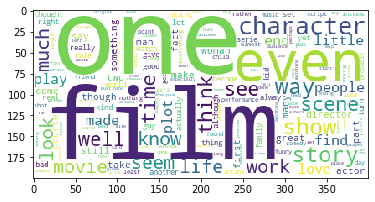

In [368]:
group = final_data[final_data['cluster_predicted'] == 4]
text = ' '.join(final_data['clean_review1'])
wc = WordCloud(background_color='white').generate(text)
plt.imshow(wc)

### Document Similarity:

In [369]:
from sklearn.metrics.pairwise import cosine_similarity

In [372]:
from sklearn.feature_extraction.text import TfidfVectorizer
count_vect_doc1=TfidfVectorizer(max_features=10000)
X_doc1=count_vect_doc1.fit_transform(final_data['clean_review1'])

In [373]:
df_doc1=pd.DataFrame(X_doc1.toarray(),columns=count_vect_doc1.get_feature_names())

##### for the 13th review, get the top 5 similar reviews

In [374]:
cs = cosine_similarity(df_doc1.T) #best way to find the cosine_similarity

In [375]:
#correct logic for randomly picking any index from inbetween the data
cs[12].argsort()[::-1][1:6]

array([9190, 3997, 9662, 9740,   14], dtype=int64)

In [376]:
final_data['clean_review1'][12]

'kid picked video store great hear liza dorothy cause sound like mom many bad song animation pretty crude compared cartoon time'

In [379]:
#Check for the different indices
final_data['clean_review1'][3997]

'well thoroughly enjoyed movie funny sad yes guy andie macdowell shagged hot interesting realistic character plot well beautiful scenery think mum like still think allowed call sad kers club though'

In [380]:
final_data['clean_review1'][9662]

'saw virtually redeeming quality movie thing see quentin tarantino seeming insane obsession attractive woman movie perhaps one decent quality overall however found movie surrealistic ridiculous hand held film making coupled slow motion cinematic gimmick found clumsy dizzying even sickening overall music throughout horrible repetitive extreme well reminding psychological warfare military various malcontent various vignette made movie haphazard placement unfulfilling unresolved content conclusion depressing movie true _film_ term reserve true art left bad feeling believe various people try spin romantic comedy though certainly isolated element movie repudiates content form conclusion association genre suggest staying far away notwithstanding seemingly overwhelming positive view imdb rating source'

In [381]:
def get_similar_words(text,sim_mat):
    cos_vals=sim_mat[text].sort_values(ascending=False)
    similar_words=cos_vals.drop(text).head(5)
    return similar_words

In [385]:
sim_mat=cosine_similarity(df_doc1.T)
sim_mat=pd.DataFrame(sim_mat,columns=df_doc1.columns,index=df_doc1.columns)
get_similar_words('bad',sim_mat)

movie     0.359575
acting    0.321227
good      0.278299
even      0.275313
like      0.274725
Name: bad, dtype: float64

In [386]:
#Understanding how the function works
sim_mat['better'].sort_values(ascending=False).drop('better').head(5)

movie    0.298209
much     0.293479
one      0.262086
could    0.250659
like     0.246254
Name: better, dtype: float64